# Automobile Price Prediction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib as plt
from matplotlib import pyplot
%matplotlib inline

In [2]:
filepath = "C:\\Users\\DELL\\Documents\\Data Analysis\\Data\\auto.csv"

# The CSV file does not contain column names in the first row. So, we use 
# header = None so that pandas automatically assign default column names (0, 1, 2, ...) 
# to the DataFrame columns 
df = pd.read_csv(filepath, header = None) 

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Lets assign names to each columns. For that, we will use the attribute information
given here: https://archive.ics.uci.edu/ml/datasets/Automobile

In [4]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df.columns = headers
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


As seen, we have "?" in some of the rows in our dataset. Lets replace them by NaN.

In [5]:
df.replace("?",np.NaN, inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# Dataset Summary 

In [6]:
df.shape

(205, 26)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

Getting a statistical summary of `numeric` data type columns

In [8]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


Getting a statistical summary of `object` data type columns

In [9]:
df.describe(include = "object")

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm,price
count,164,205,205,205,203,205,205,205,205,205,205,201,201,203,203,201
unique,51,22,2,2,2,5,3,2,7,7,8,38,36,59,23,186
top,161,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.62,3.40,68,5500,8921
freq,11,32,185,168,114,96,120,202,148,159,94,23,20,19,37,2


# Data Wrangling

## Handling missing values

In [10]:
missing_data = df.isnull()

In [11]:
#Counting the missing values in each column

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

Based on the summary above, each column has 205 rows of data and seven of the columns containing missing data:

<ol>
    <li>"normalized-losses": 41 missing data</li>
    <li>"num-of-doors": 2 missing data</li>
    <li>"bore": 4 missing data</li>
    <li>"stroke" : 4 missing data</li>
    <li>"horsepower": 2 missing data</li>
    <li>"peak-rpm": 2 missing data</li>
    <li>"price": 4 missing data</li>
</ol>

Lets replace missing data in the columns: "normalized-losses", "stroke", "bore", "horsepower" and "peak-rpm" by their `mean`.

Then replace the missing data in "num-of-doors" with the `most frequent data`.

For "price", we will `drop the entire row` having one or more missing values because we will be predicting price here.

#### Handling missing data in: "normalized-losses", "stroke", "bore", "horsepower", "peak-rpm"

In [12]:
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average normalized-losses:", avg_norm_loss)
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

Average normalized-losses: 122.0


In [13]:
avg_stroke = df["stroke"].astype("float").mean()
print("Average stroke:", avg_stroke)
df["stroke"].replace(np.nan, avg_stroke, inplace=True)

Average stroke: 3.2554228855721337


In [14]:
avg_bore=df["bore"].astype("float").mean(axis=0)
print("Average bore:", avg_bore)
df["bore"].replace(np.nan, avg_bore, inplace=True)

Average bore: 3.3297512437810957


In [15]:
avg_horsepower = df["horsepower"].astype("float").mean(axis=0)
print("Average horsepower:", avg_horsepower)
df["horsepower"].replace(np.nan, avg_horsepower, inplace=True)

Average horsepower: 104.25615763546799


In [16]:
avg_peakrpm=df["peak-rpm"].astype("float").mean(axis=0)
print("Average peak rpm:", avg_peakrpm)
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

Average peak rpm: 5125.369458128079


#### Handling missing data in "num-of-doors"

In [17]:
#Identifying the most frequent data in "num-of-doors"
df["num-of-doors"].value_counts().idxmax()

'four'

In [18]:
#replacing the missing "num-of-doors" values by the most frequent 
df["num-of-doors"].replace(np.nan, "four", inplace=True)

#### Handling missing data in "price"

In [19]:
# Dropping the entire row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace=True)

# Resetting index, because we droped two rows
df.reset_index(drop=True, inplace=True)

## Changing the data type of some columns

In [20]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

"bore", "stroke", "normalized-losses", "price" and "peak-rpm" should have numeric data type

In [21]:
df[["bore", "stroke", "price", "peak-rpm"]] = df[["bore", "stroke", "price", "peak-rpm"]].astype("float")
df[["normalized-losses", "horsepower"]] = df[["normalized-losses", "horsepower"]].astype("int")

In [22]:
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int32
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

## Standardizing data as per our requirements

<p>In our dataset, the fuel consumption columns "city-mpg" and "highway-mpg" are represented by mpg (miles per gallon) unit. Lets convert it to L/100km.<p>

<p>The formula for unit conversion is:<p>
L/100km = 235 / mpg

In [23]:
df[["city-L/100km", "highway-L/100km"]] = 235/df[["city-mpg", "highway-mpg"]]

In [24]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818


## Normalizing "length", "width", "height"

In [25]:
# Replacing (original value) by (original value)/(maximum value)
df["length"] = df["length"]/df["length"].max()
df["width"] = df["width"]/df["width"].max()
df["height"] = df["height"]/df["height"].max()

In [26]:
df[["length","width","height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


## Binning continuous "horsepower" data

In [27]:
df[["horsepower"]].dtypes

horsepower    int32
dtype: object

Text(0.5, 1.0, 'Horsepower Bins')

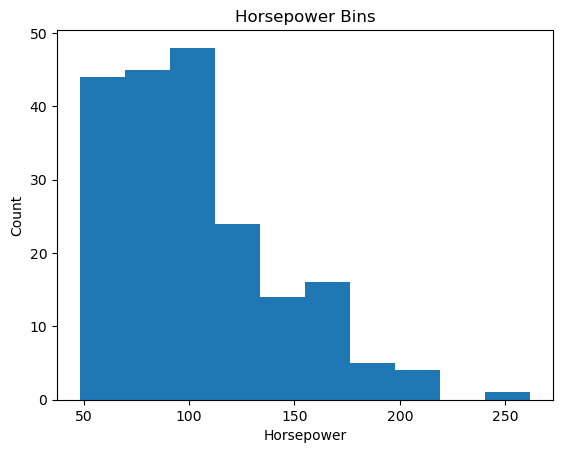

In [28]:
plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("Horsepower")
plt.pyplot.ylabel("Count")
plt.pyplot.title("Horsepower Bins")

In [29]:
#Creating a bin array haivng 4 dividers
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)

#Names for each category
group_names = ['Low', 'Medium', 'High']

#Creating bins using the above dividers and group names
df["horsepower-binned"] = pd.cut(df["horsepower"], bins, labels = group_names, include_lowest = True)
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


In [30]:
df["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Bar plot of Horsepower

Text(0.5, 1.0, 'horsepower bins')

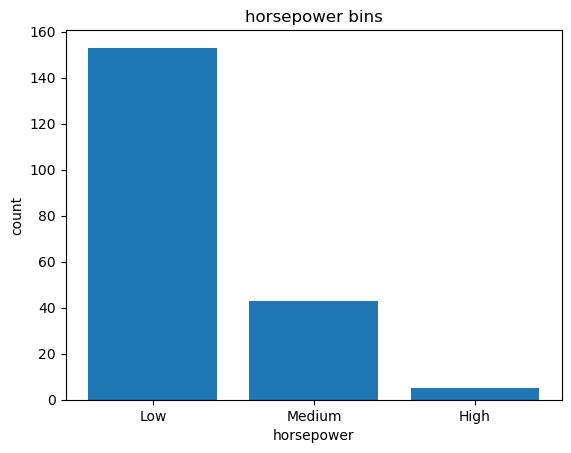

In [31]:
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

## Getting indicator variables out of the categorical variables `fuel-type` and `aspiration` 

In [32]:
df["fuel-type"].value_counts()

gas       181
diesel     20
Name: fuel-type, dtype: int64

In [33]:
df["aspiration"].value_counts()

std      165
turbo     36
Name: aspiration, dtype: int64

Lets convert both to indicator variables so that they can be used for regression analysis

In [34]:
#Getting indicator variables from "fuel-type" 
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [35]:
# merging "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# dropping the original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)

df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,21,27,13495.0,11.190476,8.703704,Low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,21,27,16500.0,11.190476,8.703704,Low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,154,5000.0,19,26,16500.0,12.368421,9.038462,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,102,5500.0,24,30,13950.0,9.791667,7.833333,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,115,5500.0,18,22,17450.0,13.055556,10.681818,Low,0,1


In [36]:
#Getting indicator variables from "aspiration" 
dummy_variable_2 = pd.get_dummies(df["aspiration"])
dummy_variable_2.head()

,std,turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [37]:
# merging "df" and "dummy_variable_2" 
df = pd.concat([df, dummy_variable_2], axis=1)

# dropping the original column "aspiration" from "df"
df.drop("aspiration", axis = 1, inplace=True)

df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,diesel,gas,std,turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,13495.0,11.190476,8.703704,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,16500.0,11.190476,8.703704,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,19,26,16500.0,12.368421,9.038462,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,24,30,13950.0,9.791667,7.833333,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,18,22,17450.0,13.055556,10.681818,Low,0,1,1,0


# Exploratory Data Analysis

Lets check the data type of each column first

In [38]:
df.dtypes

symboling               int64
normalized-losses       int32
make                   object
num-of-doors           object
body-style             object
drive-wheels           object
engine-location        object
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type            object
num-of-cylinders       object
engine-size             int64
fuel-system            object
bore                  float64
stroke                float64
compression-ratio     float64
horsepower              int32
peak-rpm              float64
city-mpg                int64
highway-mpg             int64
price                 float64
city-L/100km          float64
highway-L/100km       float64
horsepower-binned    category
diesel                  uint8
gas                     uint8
std                     uint8
turbo                   uint8
dtype: object

Statistical Analysis of Data

In [39]:
#Analysis of numerical variables
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,diesel,gas,std,turbo
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330692,3.256874,...,5117.665368,25.179104,30.686567,13207.129353,9.944145,8.044957,0.099502,0.900498,0.820896,0.179104
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.316048,...,478.113805,6.423220,6.815150,7947.066342,2.534599,1.840739,0.300083,0.300083,0.384397,0.384397
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,...,4150.000000,13.000000,16.000000,5118.000000,4.795918,4.351852,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,...,4800.000000,19.000000,25.000000,7775.000000,7.833333,6.911765,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,...,5125.369458,24.000000,30.000000,10295.000000,9.791667,7.833333,0.000000,1.000000,1.000000,0.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,...,5500.000000,30.000000,34.000000,16500.000000,12.368421,9.400000,0.000000,1.000000,1.000000,0.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,...,6600.000000,49.000000,54.000000,45400.000000,18.076923,14.687500,1.000000,1.000000,1.000000,1.000000


In [40]:
#Analysis of categorical variables
df.describe(include=['object'])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8
top,toyota,four,sedan,fwd,front,ohc,four,mpfi
freq,32,115,94,118,198,145,157,92


### Visualizing the relationship between contnuous variables and price

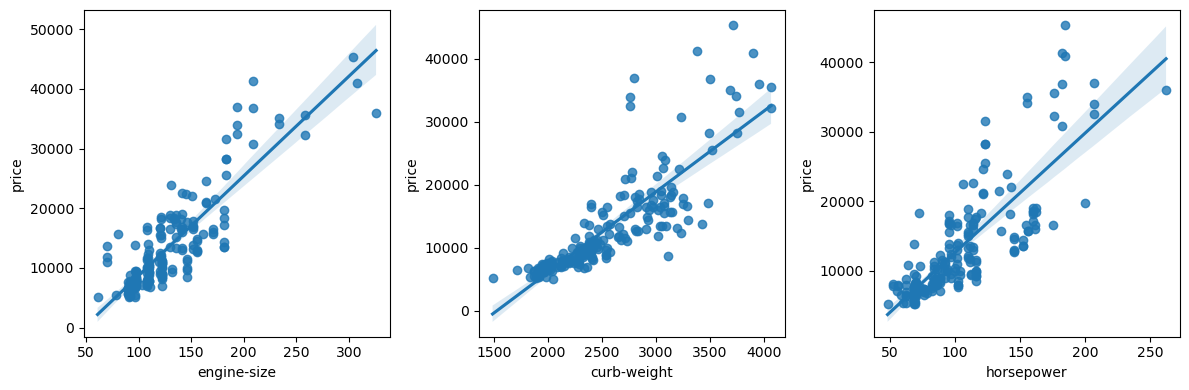

In [41]:
fig, axes = plt.pyplot.subplots(ncols=3, figsize=(12, 4))

sns.regplot(x="engine-size", y="price", data=df, ax=axes[0])
# plt.ylim(0,)

sns.regplot(x="curb-weight", y="price", data=df, ax=axes[1])
# plt.ylim(0,)

sns.regplot(x="horsepower", y="price", data=df, ax=axes[2])
# plt.ylim(0,)

# adjust spacing between subplots
plt.pyplot.tight_layout()

# show the plot
plt.pyplot.show()

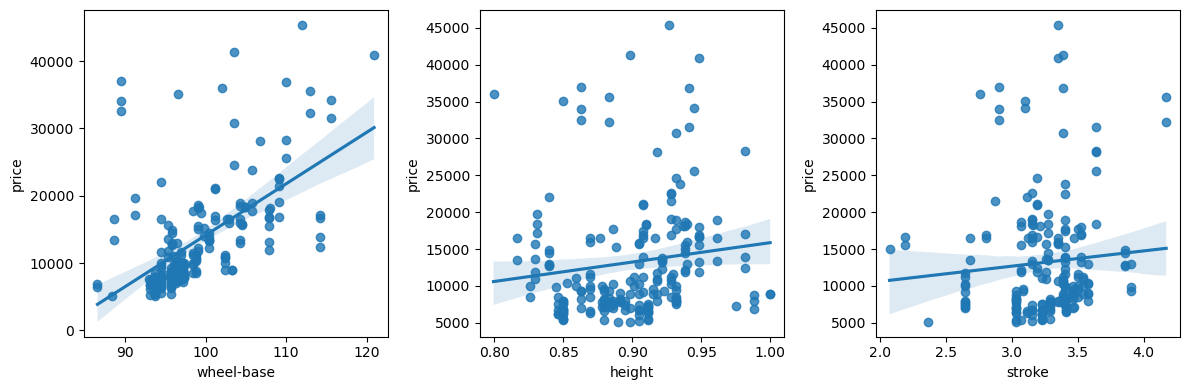

In [42]:
fig, axes = plt.pyplot.subplots(ncols=3, figsize=(12, 4))

sns.regplot(x="wheel-base", y="price", data=df, ax=axes[0])
# plt.ylim(0,)

sns.regplot(x="height", y="price", data=df, ax=axes[1])
# plt.ylim(0,)

sns.regplot(x="stroke", y="price", data=df, ax=axes[2])
# plt.ylim(0,)

# adjust spacing between subplots
plt.pyplot.tight_layout()

# show the plot
plt.pyplot.show()

### Getting the Pearson correlation coefficient 

In [43]:
corr_df = df.corr()
corr_df["price"].sort_values() #Pearson correlation of each variable with price

highway-mpg         -0.704692
city-mpg            -0.686571
std                 -0.179578
gas                 -0.110326
peak-rpm            -0.101616
symboling           -0.082391
compression-ratio    0.071107
stroke               0.082269
diesel               0.110326
normalized-losses    0.133999
height               0.135486
turbo                0.179578
bore                 0.543155
wheel-base           0.584642
length               0.690628
width                0.751265
city-L/100km         0.789898
highway-L/100km      0.801118
horsepower           0.809607
curb-weight          0.834415
engine-size          0.872335
price                1.000000
Name: price, dtype: float64

From the results of Pearson Correlation Coefficient, it can be said the variables which have a strong linear relationship with `price` are:
`engine-size`, `curb-weight`, `horsepower`, `highway-L/100km`, `city-L/100km`, `width`

Lets check the statistical significance of the relationship with `p-value`:

In [44]:
target_col = ["engine-size", "curb-weight", "horsepower", "highway-L/100km", "city-L/100km", "width"]

for col in target_col:
    pearson_coef, p_value = stats.pearsonr(df[col], df["price"])
    print("For", col, "vs price:")
    print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value) 
    print("")

For engine-size vs price:
The Pearson Correlation Coefficient is 0.8723351674455185  with a P-value of P =   9.265491622198389e-64

For curb-weight vs price:
The Pearson Correlation Coefficient is 0.8344145257702846  with a P-value of P =   2.1895772388936914e-53

For horsepower vs price:
The Pearson Correlation Coefficient is 0.8096068016571054  with a P-value of P =   6.273536270650504e-48

For highway-L/100km vs price:
The Pearson Correlation Coefficient is 0.8011176263981975  with a P-value of P =   3.046784581041283e-46

For city-L/100km vs price:
The Pearson Correlation Coefficient is 0.7898975136626942  with a P-value of P =   3.903106400939858e-44

For width vs price:
The Pearson Correlation Coefficient is 0.7512653440522673  with a P-value of P =   9.200335510481646e-38



Since the p-value for all the columns in target_col is less than 0.001, the correlation between each variable and price is statistically significant

### Visualizing the relationship between categorical variables and price

In [45]:
#List of categorical variables
cat_var = ["num-of-doors", "body-style", "drive-wheels", "engine-location", "engine-type", "horsepower-binned"]

In [46]:
#List of categorical variables
cat_var = ["num-of-doors", "body-style", "drive-wheels", "engine-location", "engine-type", "horsepower-binned"]

#Getting the unique values in each column
for col in cat_var:
    print("Uniqe values in", col, "are:")
    print(df[col].value_counts())
    print("")

Uniqe values in num-of-doors are:
four    115
two      86
Name: num-of-doors, dtype: int64

Uniqe values in body-style are:
sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

Uniqe values in drive-wheels are:
fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

Uniqe values in engine-location are:
front    198
rear       3
Name: engine-location, dtype: int64

Uniqe values in engine-type are:
ohc      145
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
Name: engine-type, dtype: int64

Uniqe values in horsepower-binned are:
Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64



#### Getting a box-plot for each

<AxesSubplot:xlabel='num-of-doors', ylabel='price'>

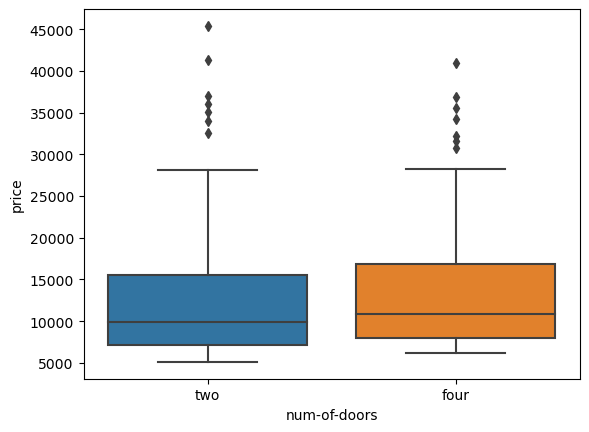

In [47]:
sns.boxplot(x="num-of-doors", y="price", data=df)

<AxesSubplot:xlabel='body-style', ylabel='price'>

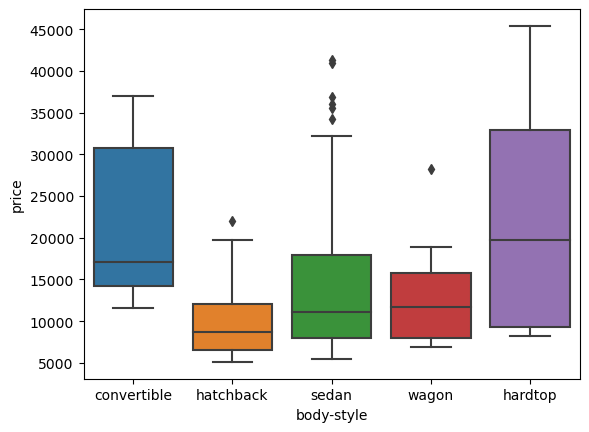

In [48]:
sns.boxplot(x="body-style", y="price", data=df)

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

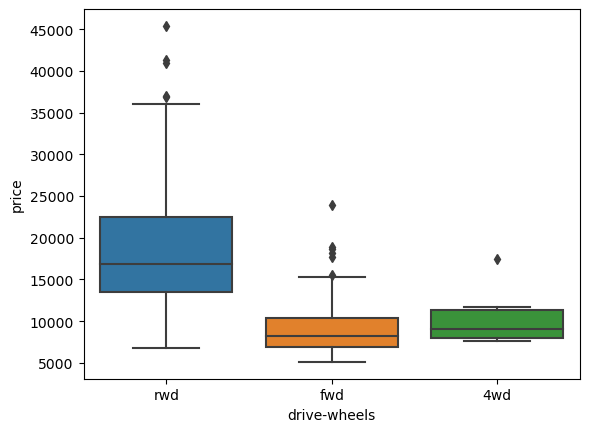

In [49]:
sns.boxplot(x="drive-wheels", y="price", data=df)

<AxesSubplot:xlabel='engine-location', ylabel='price'>

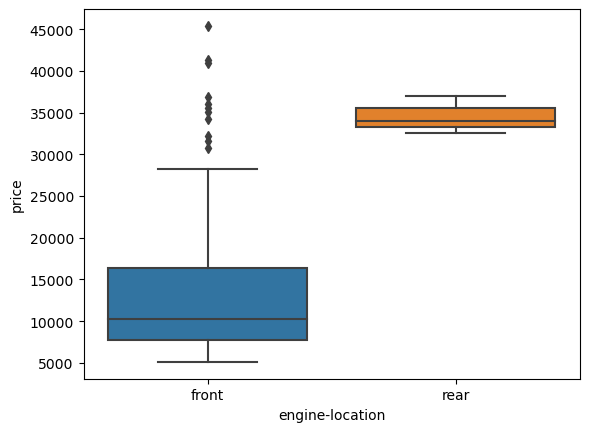

In [50]:
sns.boxplot(x="engine-location", y="price", data=df)

<AxesSubplot:xlabel='engine-type', ylabel='price'>

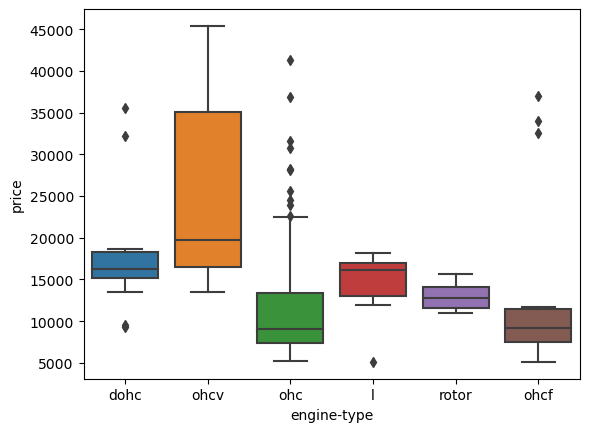

In [51]:
sns.boxplot(x="engine-type", y="price", data=df)

<AxesSubplot:xlabel='horsepower-binned', ylabel='price'>

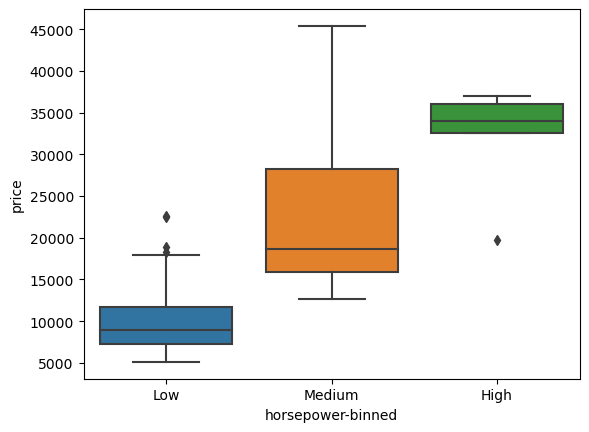

In [52]:
sns.boxplot(x="horsepower-binned", y="price", data=df)

Takeaways from above box-plots:

<ol>
<li> There's a signification amount of overlap between different categories in the box-plots for <mark>num-of-doors</mark> and <mark>body-style</mark>. So, both of these categorical variables shouldn't be used to predict price. </li>
<br>
<li> The distribution of price between the different <mark>drive-wheels</mark> categories differs. So, <mark>drive-wheels</mark> could potentially be a predictor of price.</li>
<br>
<li> The distribution of price between these two <mark>engine-location</mark> categories, front and rear, are distinct enough to take <mark>engine-location</mark> as a potential good predictor of price. </li>
<br>
<li> Since the distribution of price between the different <mark>engine-type</mark> categories differs. So, <mark>engine-type</mark> could also be used for price prediction.</li>
<br>
<li> Also, as expected, there's a significant difference between the distribution of price in <mark>horsepower-binned</mark> boxplot. </li>
    </ol>

### Lets check how a combination of 2 variables contribute to the price with `Heatmap`

#### Heatmap of `Drive Wheels` and `Body Style` vs. `Price`

In [53]:
df1 = df[["drive-wheels","body-style","price"]]
df_grp1 = df1.groupby(["drive-wheels","body-style"],as_index=False).mean()
df_grp1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [54]:
grouped_pivot1 = df_grp1.pivot(index="drive-wheels",columns="body-style")
grouped_pivot1.fillna(0, inplace = True) #Filling missing values with 0
grouped_pivot1

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

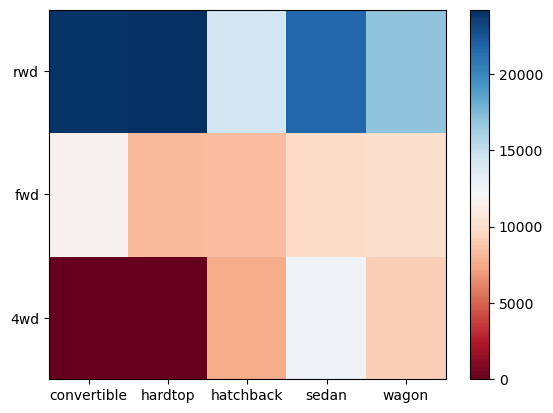

In [55]:
fig, ax = pyplot.subplots()
im = ax.pcolor(grouped_pivot1, cmap='RdBu')

#label names
row_labels = grouped_pivot1.columns.levels[1]
col_labels = grouped_pivot1.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot1.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot1.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
#pyplot.xticks(rotation=90)

fig.colorbar(im)
pyplot.show()

#### Heatmap of `Drive Wheels` and `Engine Type` vs. `Price`

In [56]:
df2 = df[["drive-wheels","engine-type","price"]]
df_grp2 = df2.groupby(["drive-wheels","engine-type"],as_index=False).mean()
df_grp2

,drive-wheels,engine-type,price
0,4wd,ohc,11375.333333
1,4wd,ohcf,9560.400000
2,fwd,dohc,18385.000000
3,fwd,l,5151.000000
4,fwd,ohc,9074.980952
5,fwd,ohcf,7813.285714
6,fwd,ohcv,13799.000000
7,rwd,dohc,18062.700000
8,rwd,l,15489.090909
9,rwd,ohc,18655.891892


In [57]:
grouped_pivot2 = df_grp2.pivot(index="drive-wheels",columns="engine-type")
grouped_pivot2.fillna(0, inplace = True) #Filling missing values with 0
grouped_pivot2

price                                                     \
engine-type      dohc             l           ohc          ohcf     ohcv   
drive-wheels                                                               
4wd               0.0      0.000000  11375.333333   9560.400000      0.0   
fwd           18385.0   5151.000000   9074.980952   7813.285714  13799.0   
rwd           18062.7  15489.090909  18655.891892  34528.000000  28488.2   

                       
engine-type     rotor  
drive-wheels           
4wd               0.0  
fwd               0.0  
rwd           13020.0

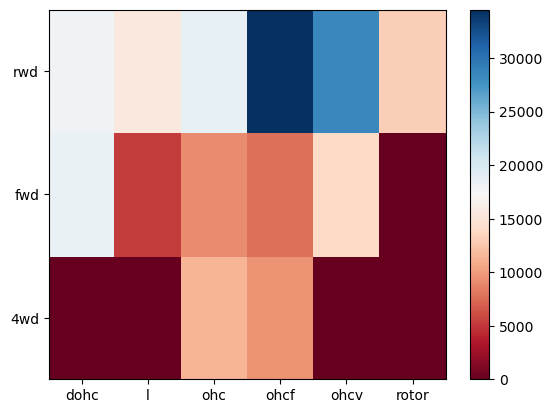

In [58]:
fig, ax = pyplot.subplots()
im = ax.pcolor(grouped_pivot2, cmap='RdBu')

#label names
row_labels = grouped_pivot2.columns.levels[1]
col_labels = grouped_pivot2.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot2.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot2.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
#pyplot.xticks(rotation=90)

fig.colorbar(im)
pyplot.show()

#### Heatmap of `Body Style` and `Engine Type` vs. `Price`

In [59]:
df3 = df[["engine-type","body-style","price"]]
df_grp3 = df3.groupby(["engine-type","body-style"],as_index=False).mean()
df_grp3

,engine-type,body-style,price
0,dohc,convertible,14997.500000
1,dohc,hatchback,15061.000000
2,dohc,sedan,22281.600000
3,dohc,wagon,15750.000000
4,l,hatchback,5151.000000
5,l,sedan,15758.571429
6,l,wagon,15017.500000
7,ohc,convertible,14632.000000
8,ohc,hardtop,13142.400000
9,ohc,hatchback,9001.153846


In [60]:
grouped_pivot3 = df_grp3.pivot(index="engine-type",columns="body-style")
grouped_pivot3.fillna(0, inplace = True) #Filling missing values with 0
grouped_pivot3

price                                                   
body-style  convertible  hardtop     hatchback         sedan         wagon
engine-type                                                               
dohc            14997.5      0.0  15061.000000  22281.600000  15750.000000
l                   0.0      0.0   5151.000000  15758.571429  15017.500000
ohc             14632.0  13142.4   9001.153846  13134.070423  12114.133333
ohcf            37028.0  33278.0   6591.333333   9070.600000   9342.000000
ohcv            35056.0  45400.0  17949.250000  26604.500000  14399.000000
rotor               0.0      0.0  13020.000000      0.000000      0.000000

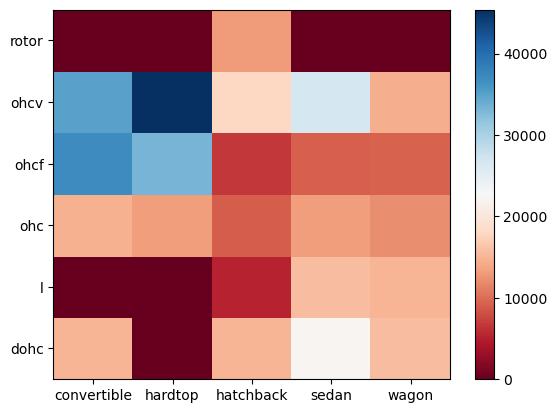

In [61]:
fig, ax = pyplot.subplots()
im = ax.pcolor(grouped_pivot3, cmap='RdBu')

#label names
row_labels = grouped_pivot3.columns.levels[1]
col_labels = grouped_pivot3.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot3.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot3.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
#pyplot.xticks(rotation=90)

fig.colorbar(im)
pyplot.show()

### ANOVA test for `drive-wheels`, `engine-location` and `engine-type`

ANOVA for `drive-wheels`

In [62]:
df["drive-wheels"].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [63]:
grouped_test1=df[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test1.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


In [64]:
# extracting the groups as separate arrays
group1 = grouped_test1.get_group('rwd')['price']
group2 = grouped_test1.get_group('fwd')['price']
group3 = grouped_test1.get_group('4wd')['price']

In [65]:
# Performing one-way ANOVA test on the groups
f_statistic, p_value = stats.f_oneway(group1, group2, group3)

# print the results
print('F-statistic:', f_statistic)
print('P-value:', p_value)

dfn = len(df["drive-wheels"].unique()) - 1   # degrees of freedom of the numerator
dfd = len(df["drive-wheels"]) - len(df["drive-wheels"].unique())  # degrees of freedom of the denominator
alpha = 0.05  # desired significance level

# Get the F-critical value for the given degrees of freedom and alpha
f_crit = stats.f.ppf(q=1-alpha, dfn=dfn, dfd=dfd)

print("The F-critical value is:",f_crit)

F-statistic: 67.95406500780398
P-value: 3.3945443577151245e-23
The F-critical value is: 3.0415182456866066


ANOVA for `engine-location`

In [66]:
df["engine-location"].unique()

array(['front', 'rear'], dtype=object)

In [67]:
grouped_test2=df[['engine-location', 'price']].groupby(['engine-location'])
grouped_test2.head(2)

,engine-location,price
0,front,13495.0
1,front,16500.0
123,rear,32528.0
124,rear,34028.0


In [68]:
# extracting the groups as separate arrays
group1 = grouped_test2.get_group('front')['price']
group2 = grouped_test2.get_group('rear')['price']

In [69]:
# Performing one-way ANOVA test on the groups
f_statistic, p_value = stats.f_oneway(group1, group2)

# print the results
print('F-statistic:', f_statistic)
print('P-value:', p_value)

dfn = len(df["engine-location"].unique()) - 1   # degrees of freedom of the numerator
dfd = len(df["engine-location"]) - len(df["engine-location"].unique())  # degrees of freedom of the denominator
alpha = 0.05  # desired significance level

# Get the F-critical value for the given degrees of freedom and alpha
f_crit = stats.f.ppf(q=1-alpha, dfn=dfn, dfd=dfd)

print("The F-critical value is:",f_crit)

F-statistic: 24.495550318865693
P-value: 1.583490019777699e-06
The F-critical value is: 3.8886126124173037


ANOVA for `engine-type`

In [70]:
df["engine-type"].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf'], dtype=object)

In [71]:
grouped_test3=df[['engine-type', 'price']].groupby(['engine-type'])
grouped_test3.head(2)

,engine-type,price
0,dohc,13495.0
1,dohc,16500.0
2,ohcv,16500.0
3,ohc,13950.0
4,ohc,17450.0
17,l,5151.0
46,ohcv,36000.0
52,rotor,10945.0
53,rotor,11845.0
104,l,11900.0


In [72]:
# extracting the groups as separate arrays
group1 = grouped_test3.get_group('dohc')['price']
group2 = grouped_test3.get_group('ohcv')['price']
group3 = grouped_test3.get_group('ohc')['price']
group4 = grouped_test3.get_group('l')['price']
group5 = grouped_test3.get_group('rotor')['price']
group6 = grouped_test3.get_group('ohcf')['price']

In [73]:
# Performing one-way ANOVA test on the groups
f_statistic, p_value = stats.f_oneway(group1, group2, group3, group4, group5, group6)

# print the results
print('F-statistic:', f_statistic)
print('P-value:', p_value)

dfn = len(df["engine-type"].unique()) - 1   # degrees of freedom of the numerator
dfd = len(df["engine-type"]) - len(df["engine-type"].unique())  # degrees of freedom of the denominator
alpha = 0.05  # desired significance level

# Get the F-critical value for the given degrees of freedom and alpha
f_crit = stats.f.ppf(q=1-alpha, dfn=dfn, dfd=dfd)

print("The F-critical value is:",f_crit)

F-statistic: 9.845110955850453
P-value: 2.0865492749735665e-08
The F-critical value is: 2.260406213004513


# Model Development

For model development, we choose these features: engine-size, curb-weight, horsepower, highway-L/100km, drive-wheels 

Before going ahead with applying regression model on our dataset, lets convert drive-wheels to an indicator variable

In [74]:
#Getting indicator variables from "drive-wheels" 
dummy_variable_3 = pd.get_dummies(df["drive-wheels"])
dummy_variable_3.head()

,4wd,fwd,rwd
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,1,0,0


In [75]:
# merging "df" and "dummy_variable_3" 
df = pd.concat([df, dummy_variable_3], axis=1)

# dropping the original column "drive-wheels" from "df"
df.drop("drive-wheels", axis = 1, inplace=True)

df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,engine-location,wheel-base,length,width,height,...,city-L/100km,highway-L/100km,horsepower-binned,diesel,gas,std,turbo,4wd,fwd,rwd
0,3,122,alfa-romero,two,convertible,front,88.6,0.811148,0.890278,0.816054,...,11.190476,8.703704,Low,0,1,1,0,0,0,1
1,3,122,alfa-romero,two,convertible,front,88.6,0.811148,0.890278,0.816054,...,11.190476,8.703704,Low,0,1,1,0,0,0,1
2,1,122,alfa-romero,two,hatchback,front,94.5,0.822681,0.909722,0.876254,...,12.368421,9.038462,Medium,0,1,1,0,0,0,1
3,2,164,audi,four,sedan,front,99.8,0.848630,0.919444,0.908027,...,9.791667,7.833333,Low,0,1,1,0,0,1,0
4,2,164,audi,four,sedan,front,99.4,0.848630,0.922222,0.908027,...,13.055556,10.681818,Low,0,1,1,0,1,0,0


In [76]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

In [77]:
input1 = [('scale',StandardScaler()), ('model',LinearRegression())]
pipe1 = Pipeline(input1) #Creating a Pipline object for Linear fit model

input2 = [('scale',StandardScaler()), ('polynomial', PolynomialFeatures(degree=2, include_bias=False)), ('model',LinearRegression())]
pipe2 = Pipeline(input2) #Creating a Pipline object for polynomial fit model

In [78]:
vars1 = ["engine-size"]
vars2 = ["engine-size", "curb-weight"]
vars3 = ["engine-size", "curb-weight", "horsepower"]
vars4 = ["engine-size", "curb-weight", "horsepower", "highway-L/100km"]
vars5 = ["engine-size", "curb-weight", "horsepower", "highway-L/100km", "4wd", "fwd", "rwd"]


z1 = df[vars1].astype("float")
z2 = df[vars2].astype("float")
z3 = df[vars3].astype("float")
z4 = df[vars4].astype("float")
z5 = df[vars5].astype("float")
y = df[["price"]]

In [79]:
z_list = [z1, z2, z3, z4, z5]
vars_list = [vars1,vars2,vars3,vars4, vars5]

In [80]:
pipe1.fit(z1, y)
y_pred = pipe1.predict(z1)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
print("The R-squared is:", r2)
print("The mean-squared error is:", mse)

The R-squared is: 0.7609686443622008
The mean-squared error is: 15021126.025174143


In [81]:
pipe1.fit(z1, y)
y_pred = pipe1.predict(z1)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
print("The R-squared is:", r2)
print("The mean-squared error is:", mse)

The R-squared is: 0.7609686443622008
The mean-squared error is: 15021126.025174143


In [82]:
print("variables:",vars2,"is",2)

variables: ['engine-size', 'curb-weight'] is 2


#### Getting the `R-squared` and `Mean-Squared Error` for `Linear Regression Model` with each set of variables

In [83]:
i = 0
for z in z_list:
    pipe1.fit(z, y)
    y_pred = pipe1.predict(z)
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    print("For the linear model with variables:",vars_list[i])
    print("R-squared is:", r2)
    print("Mean-squared error is:", mse/(10**5))
    print("")
    i += 1

For the linear model with variables: ['engine-size']
R-squared is: 0.7609686443622008
Mean-squared error is: 150.21126025174144

For the linear model with variables: ['engine-size', 'curb-weight']
R-squared is: 0.7924548499107636
Mean-squared error is: 130.42480753563137

For the linear model with variables: ['engine-size', 'curb-weight', 'horsepower']
R-squared is: 0.809142046699173
Mean-squared error is: 119.93829687276252

For the linear model with variables: ['engine-size', 'curb-weight', 'horsepower', 'highway-L/100km']
R-squared is: 0.811811561534475
Mean-squared error is: 118.26072956532086

For the linear model with variables: ['engine-size', 'curb-weight', 'horsepower', 'highway-L/100km', '4wd', 'fwd', 'rwd']
R-squared is: 0.8204489949586534
Mean-squared error is: 112.83282343758944



#### Getting the `R-squared` and `Mean-Squared Error` for `Polynomial Model` with each set of variables

In [84]:
i = 0
for z in z_list:
    pipe2.fit(z, y)
    y_pred = pipe2.predict(z)
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    print("For the polynomial model with variables:",vars_list[i])
    print("R-squared is:", r2)
    print("Mean-squared error is:", mse/(10**5))
    print("")
    i += 1

For the polynomial model with variables: ['engine-size']
R-squared is: 0.7610415105095263
Mean-squared error is: 150.16546995870547

For the polynomial model with variables: ['engine-size', 'curb-weight']
R-squared is: 0.7997727362365322
Mean-squared error is: 125.82612664525345

For the polynomial model with variables: ['engine-size', 'curb-weight', 'horsepower']
R-squared is: 0.8395128728305252
Mean-squared error is: 100.85276704382358

For the polynomial model with variables: ['engine-size', 'curb-weight', 'horsepower', 'highway-L/100km']
R-squared is: 0.8531061720624729
Mean-squared error is: 92.31051281461733

For the polynomial model with variables: ['engine-size', 'curb-weight', 'horsepower', 'highway-L/100km', '4wd', 'fwd', 'rwd']
R-squared is: 0.8855979429291557
Mean-squared error is: 71.8921462088119



# Model Evaluation and Refinement

In [86]:
from sklearn.model_selection import cross_val_predict, cross_val_score

In [97]:
print("For the features:",vars4,", with Multiple Linear Regression")
Rcross = cross_val_score(pipe1, df[vars4], df[["price"]], cv=4)
print("the mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

For the features: ['engine-size', 'curb-weight', 'horsepower', 'highway-L/100km'] , with Multiple Linear Regression
the mean of the folds are 0.6363828116650971 and the standard deviation is 0.1849818520390966


In [98]:
print("For the features:",vars5,", with Multiple Linear Regression")
Rcross = cross_val_score(pipe1, df[vars5], df[["price"]], cv=4)
print("the mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

For the features: ['engine-size', 'curb-weight', 'horsepower', 'highway-L/100km', '4wd', 'fwd', 'rwd'] , with Multiple Linear Regression
the mean of the folds are 0.520429301882966 and the standard deviation is 0.3247492965216293


In [106]:
print("For the features:",vars3,", with Polynomial Fit")
Rcross = cross_val_score(pipe2, df[vars3], df[["price"]], cv=4)
print("the mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

For the features: ['engine-size', 'curb-weight', 'horsepower'] , with Polynomial Fit
the mean of the folds are 0.5113372470723904 and the standard deviation is 0.15979241974000266


In [103]:
print("For the features:",vars4,", with Polynomial Fit")
Rcross = cross_val_score(pipe2, df[vars4], df[["price"]], cv=4)
print("he mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

For the features: ['engine-size', 'curb-weight', 'horsepower', 'highway-L/100km'] , with Polynomial Fit
he mean of the folds are 0.558731930699104 and the standard deviation is 0.1992842143015492


In [107]:
print("For the features:",vars5,", with Polynomial Fit")
Rcross = cross_val_score(pipe2, df[vars5], df[["price"]], cv=4)
print("the mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

For the features: ['engine-size', 'curb-weight', 'horsepower', 'highway-L/100km', '4wd', 'fwd', 'rwd'] , with Polynomial Fit
the mean of the folds are -5.592147012996719e+20 and the standard deviation is 9.685882749904852e+20


From the cross-validation done above, it can be said that the `multiple linear regression` model with the variables, `vars4`: `engine-size`, `curb-weight`, `horsepower`, `highway-L/100km` is the `best model`. Because it has the highest mean R-squared among all models.

### Ridge Regression to get around overfitting

In [110]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [111]:
parameters= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [117]:
RR=Ridge()
Grid = GridSearchCV(RR, parameters,cv=4)
Grid.fit(z4, df[["price"]])

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [118]:
BestRR=Grid.best_estimator_
BestRR

Ridge(alpha=10000)

In [121]:
RidgeModel = Ridge(alpha = 10000)
RidgeModel.fit(z4, df[["price"]])
RidgeModel.score(z4, df[["price"]])

0.8087470132454458

In [170]:
coeff = RidgeModel.coef_.tolist()[0]
coeff = list(map(lambda x: round(x, 3), coeff))
coeff

[76.292, 4.932, 48.592, 7.641]

In [173]:
c = RidgeModel.intercept_.tolist()[0]
c = round(c,3)
c

-14163.31

In [175]:
print("Price =", coeff[0],"*", vars4[0], "+", coeff[1],"*", vars4[1], "+", coeff[2],"*", vars4[2], "+", coeff[3],"*", vars4[3], c)

Price = 76.292 * engine-size + 4.932 * curb-weight + 48.592 * horsepower + 7.641 * highway-L/100km -14163.31
